In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data1=pd.read_csv(r"C:\Users\Anjishnu Satpathy\Downloads\Week-4-Project\Week-4-Project\fashion-mnist_train.csv")


In [41]:
data1= np.array(data1)
m,n= data1.shape
data_train=data1.T
Y_train=data_train[0]
X_train=data_train[1:]
X_train=X_train/225

In [42]:
X_train.shape

(784, 60000)

In [43]:
def init_param():
    W1= np.random.rand(10,784)-0.5
    b1= np.random.rand(10,1)-0.5
    W2= np.random.rand(10,10)-0.5
    b2= np.random.rand(10,1)-0.5
    return W1,b1,W2,b2

def reLU(Z):
    return np.maximum(Z,0)

def softmax(Z):
    return np.exp(Z)/sum(np.exp(Z))

def forward_prop(W1,b1,W2,b2,X):
    Z1= W1.dot(X) + b1
    A1= reLU(Z1)
    Z2= W2.dot(A1) + b2
    A2= softmax(Z2)
    return Z1,A1,Z2,A2

def reLU_deriv(Z):
    return Z > 0

#ONEHOTencoder copied code
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def back_prop(Z1,A1,Z2,A2,W1,W2,X,Y):
    onehot_Y= one_hot(Y)
    dZ2= A2 - onehot_Y
    dW2= 1/m * dZ2.dot(A1.T)
    db2= 1/m * np.sum(dZ2)
    dZ1= W2.T.dot(dZ2) * reLU_deriv(Z1)
    dW1= 1/m * dZ1.dot(X.T)
    db1= 1/m * np.sum(dZ1)
    return dW1,db1,dW2,db2

def update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha):
    W1= W1 - alpha*dW1
    b1= b1 - alpha*db1
    W2= W2 - alpha*dW2
    b2= b2 - alpha*db2
    return W1,b1,W2,b2
    

In [44]:
def gradient_descent(X,Y,alpha,iterations):
    W1,b1,W2,b2 = init_param()
    for i in range(iterations):
        Z1,A1,Z2,A2 = forward_prop(W1,b1,W2,b2,X)
        dW1,db1,dW2,db2 = back_prop(Z1,A1,Z2,A2,W1,W2,X,Y)
        W1,b1,W2,b2 = update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha)
        if (i % 100==0): 
            print("Iteration: ", i)
            prediction = get_predictions(A2)
            print(get_accuracy(prediction,Y))
    return W1,b1,W2,b2

def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size        

In [53]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.05, 1000)

Iteration:  0
[6 6 3 ... 6 6 6] [2 9 6 ... 8 8 7]
0.06395
Iteration:  100
[8 9 2 ... 8 8 7] [2 9 6 ... 8 8 7]
0.59505
Iteration:  200
[8 7 2 ... 8 8 7] [2 9 6 ... 8 8 7]
0.6942666666666667
Iteration:  300
[8 7 2 ... 8 8 7] [2 9 6 ... 8 8 7]
0.7234666666666667
Iteration:  400
[8 7 2 ... 8 8 7] [2 9 6 ... 8 8 7]
0.7344833333333334
Iteration:  500
[8 7 2 ... 8 8 7] [2 9 6 ... 8 8 7]
0.7541166666666667
Iteration:  600
[8 7 2 ... 8 8 7] [2 9 6 ... 8 8 7]
0.76925
Iteration:  700
[8 7 2 ... 8 8 7] [2 9 6 ... 8 8 7]
0.7769166666666667
Iteration:  800
[8 7 2 ... 8 8 7] [2 9 6 ... 8 8 7]
0.78235
Iteration:  900
[8 7 2 ... 8 8 7] [2 9 6 ... 8 8 7]
0.7857333333333333


In [54]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    prediction = get_predictions(A2)
    return prediction

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [8]
Label:  2


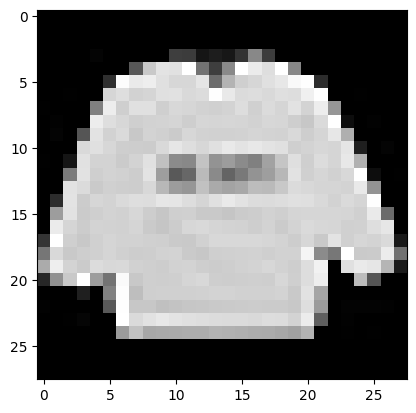

Prediction:  [7]
Label:  9


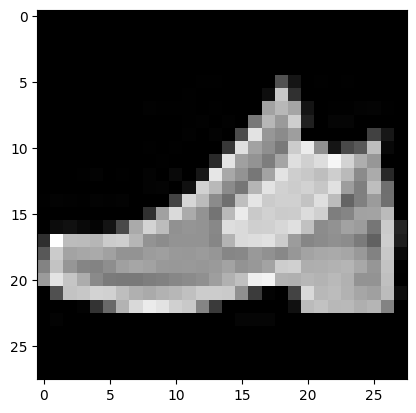

Prediction:  [2]
Label:  6


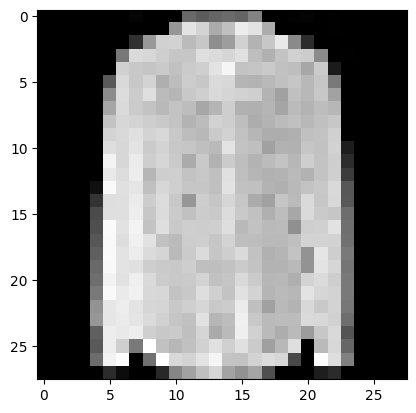

Prediction:  [0]
Label:  0


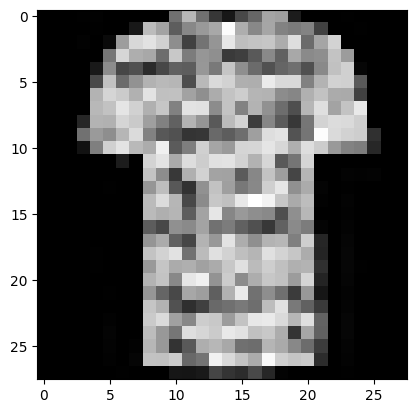

In [55]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [56]:
test_data = pd.read_csv(r"C:\Users\Anjishnu Satpathy\Downloads\Week-4-Project\Week-4-Project\fashion-mnist_test.csv")
test_data= np.array(test_data)
m,n= test_data.shape
data_test=test_data.T
Y_test=data_test[0]
X_test=data_test[1:]
X_test=X_test/225

In [57]:
test_predictions = make_predictions(X_test, W1, b1, W2, b2)
get_accuracy(test_predictions, Y_test)

[0 1 2 ... 8 8 0] [0 1 2 ... 8 8 1]


0.7881